<a href="https://colab.research.google.com/github/edison0828/generative_ai/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📈 股票策略產生機器人

說明 :
這是一個基於 OpenAI GPT-4o 的選股策略建議系統，專為 **非專業投資者** 設計。使用者只需輸入簡單的投資需求，例如「我想保守一點、不想每天看盤」，AI 就會自動產生一份適合的交易策略。

## 安裝套件

In [ ]:

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

!pip install openai
!pip install gradio

## 設定API KEY

In [ ]:
import os
from google.colab import userdata

# 【使用 OpenAI】
api_key = userdata.get('OpenAI')
model = "gpt-4o"

os.environ['OPENAI_API_KEY']=api_key

## 設計股票策略產生機器人

In [26]:
from openai import OpenAI
client = OpenAI()

In [33]:
import openai
import gradio as gr
import time

# 策略生成功能
def chat_fn(message, history):
    prompt = f"""
你是一位擅長將股票策略教給新手的金融專家。
請根據以下需求，設計一個實用的交易策略，適合專業及非專業投資者使用。
請使用白話文說明配合專業術語，不要直接用專業術語，最後一定要給一個完整的選股條件範例要有參考到不同的資訊不要只有單一資訊(例如價格，財報，籌碼之類的)，如果有任何指標要給出一個標準的值不要只是說較大或較小之類的話，並說明進出場條件。

使用者需求：「{message}」
"""

    response = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "你是一位友善的股票策略指導老師。"},
            {"role": "user", "content": prompt}
        ],
        stream=True
    )

    full_text = ""
    for chunk in response:
        if chunk.choices and chunk.choices[0].delta.content:
            content = chunk.choices[0].delta.content
            full_text += content
            yield full_text
            time.sleep(0.02)

## Gradio UI

In [34]:
demo = gr.ChatInterface(
    fn=chat_fn,
    title="📈 股票策略產生機器人",
    description="輸入你的投資需求，讓 AI 幫你產生一個簡單易懂的交易策略 例如「我想要一個短線高報酬的策略」✨",
    theme="soft",
)

demo.launch(debug=True)


/usr/local/lib/python3.11/dist-packages/gradio/chat_interface.py:334: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  self.chatbot = Chatbot(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://16401de7ba82559fd8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7864 <> https://16401de7ba82559fd8.gradio.live


## 實際效果截圖
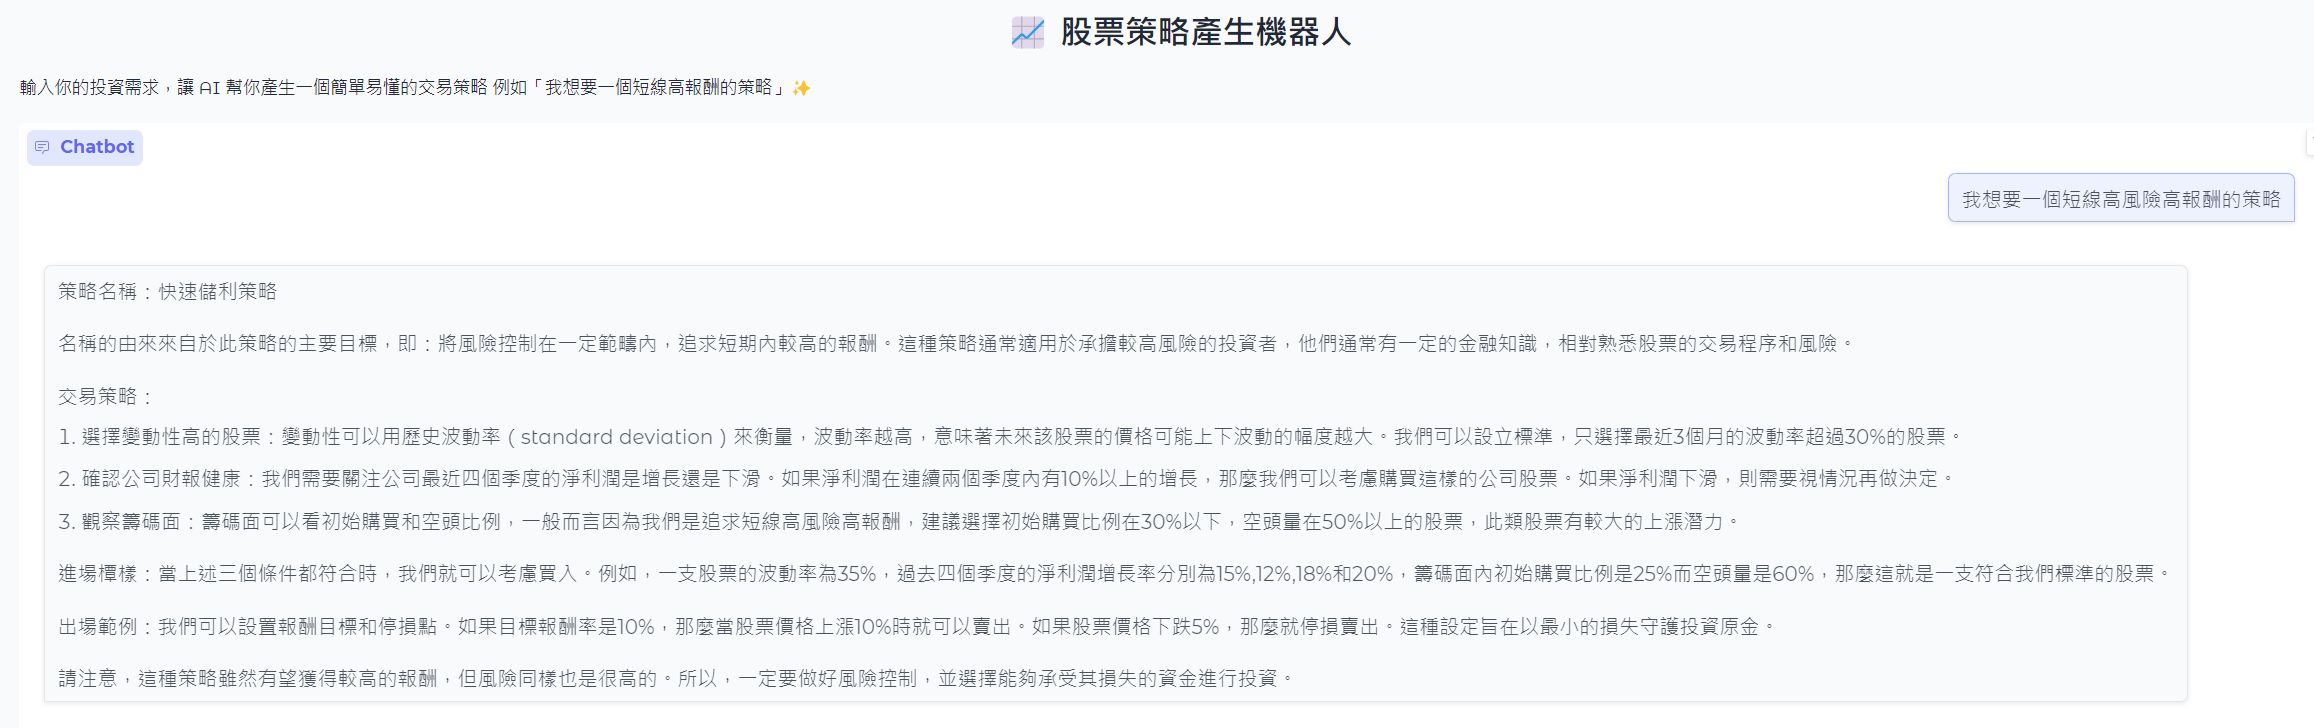

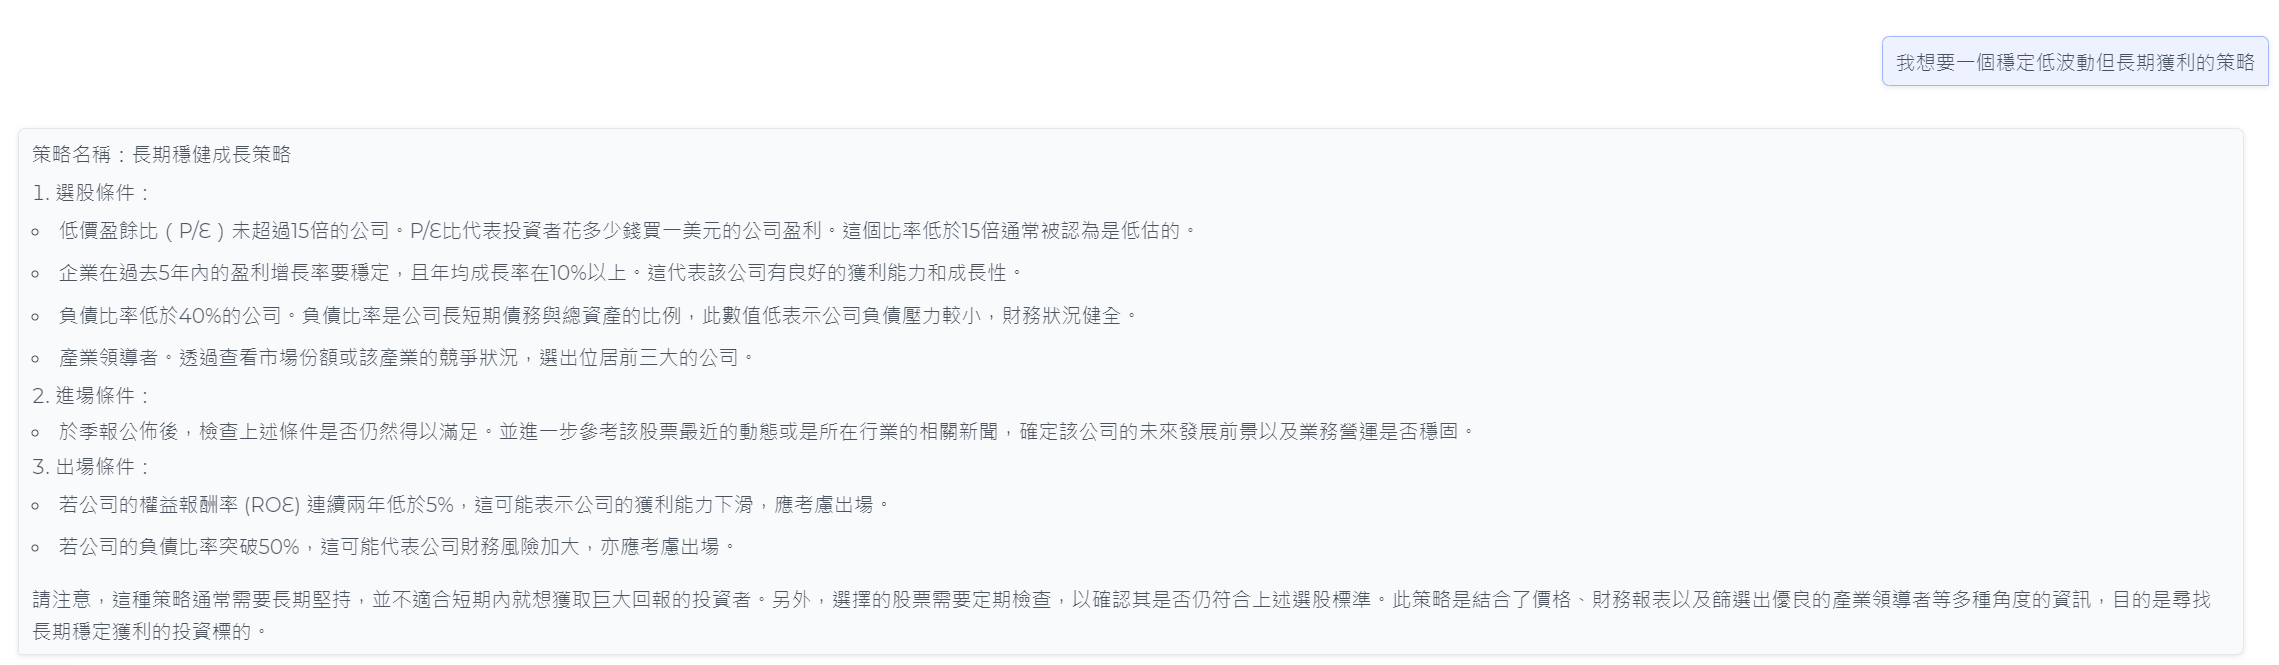